In [13]:
pwd()

"/home/zyu20/git/BulkLMM.jl/test"

In [2]:
cd("..")

In [3]:
Threads.nthreads()

24

In [73]:
include("BXDdata_for_test.jl"); ## Load BXD data used for testing:

In [15]:
using LoopVectorization

In [16]:
include("../src/scan_LiteQTL.jl"); ## Load multithreaded functions to be tested:

In [64]:
include("../src/parallel_helpers.jl");

In [18]:
BLAS.set_num_threads(24)

In [19]:
BLAS.get_num_threads()

24

In [20]:
hsq_list = collect(0:10) * 0.1;

In [21]:
kinship_Gc = CSV.read("run-gemma/output/kinship.cXX.txt", DataFrame, delim = '\t', header = false) |> Matrix;

In [34]:
@time bulkscan_LODs = bulkscan(pheno, geno, kinship, hsq_list);

 14.898836 seconds (2.16 k allocations: 22.258 GiB, 10.58% gc time)


In [35]:
bulkscan_LODs[1:6, :]

6×35556 Matrix{Float64}:
 0.0957757  0.130312  0.094194  0.0362664  …  0.0466633  0.354027  0.539208
 0.0957757  0.130312  0.094194  0.0362664     0.0466633  0.354027  0.539208
 0.0957757  0.130312  0.094194  0.0362664     0.0466633  0.354027  0.539208
 0.0957757  0.130312  0.094194  0.0362664     0.0466633  0.354027  0.539208
 0.0957757  0.130312  0.094194  0.0362664     0.0466633  0.354027  0.539208
 0.0957757  0.130312  0.094194  0.0362664  …  0.0466633  0.354027  0.539208

In [24]:
gemma = "/home/zyu20/Softwares/gemma-0.98.5-linux-static-AMD64";

In [25]:
gemma_results = readdlm("run-gemma/output/gemma_results.txt.assoc.txt", '\t');

In [26]:
function p2lod(pval::Float64)
    
    lrs = -log10(pval)*2*log(10)
    lod = lrs/(2*log(10))
    
    # return lrs
    return lod

end

p2lod (generic function with 1 method)

In [27]:
gemma_LODs = map(x -> p2lod(x), gemma_results[2:end, 10]);

In [28]:
test_y1 = reshape(pheno[:, 1], :, 1);

In [41]:
testlod_1 = scan_alt(test_y1, geno, kinship; reml = false)[3];

In [42]:
hcat(testlod_1, bulkscan_LODs[:, 1])

7321×2 Matrix{Float64}:
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120007  0.0957793
 0.00953337   0.201649
 ⋮            
 0.260178     0.256527
 0.260178     0.256527
 0.260178     0.256527
 0.252712     0.252758
 0.378291     0.373096
 0.378291     0.373096
 0.219357     0.216899
 0.200273     0.198309
 0.202546     0.20053
 0.177705     0.176191
 0.181695     0.178684
 0.181695     0.178684

In [43]:
hcat(gemma_LODs, bulkscan_LODs[:, 7919])

7321×2 Matrix{Float64}:
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140767  0.0226982
 0.0956639  0.148289
 ⋮          
 0.689165   0.341669
 0.689165   0.341669
 0.689165   0.341669
 0.392849   0.150139
 0.0056495  0.176887
 0.0056495  0.176887
 0.0148848  0.204484
 0.0380779  0.243271
 0.0356182  0.239282
 0.0597129  0.276782
 0.0418368  0.234898
 0.0418368  0.234898

In [44]:
using Plots

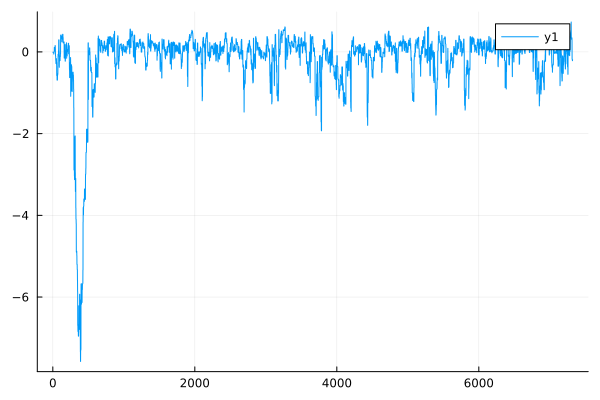

In [33]:
plot(gemma_LODs .- bulkscan_LODs[:, 7919])

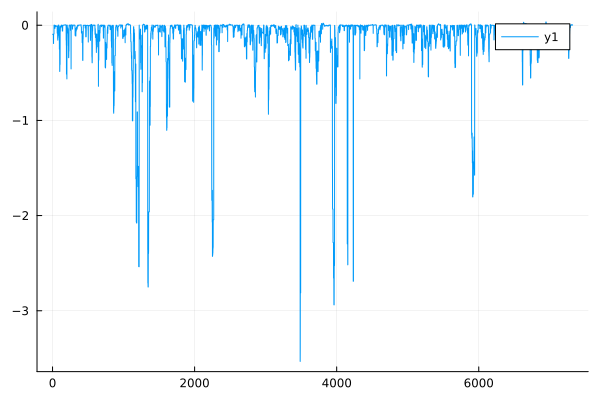

In [45]:
plot(testlod_1 .- bulkscan_LODs[:, 1])

In [46]:
@time scan_lite_null_lod = scan_lite(pheno, geno, kinship, 24; nt_blas = 24, reml = true);

249.077730 seconds (33.69 M allocations: 488.142 GiB, 4.84% gc time, 0.03% compilation time)


In [47]:
scan_lite_null_lod

7321×35556 Matrix{Float64}:
 0.000119096  0.0453796  0.00292759  …  0.0458121   0.003295     0.342962
 0.000119096  0.0453796  0.00292759     0.0458121   0.003295     0.342962
 0.000119096  0.0453796  0.00292759     0.0458121   0.003295     0.342962
 0.000119096  0.0453796  0.00292759     0.0458121   0.003295     0.342962
 0.000119096  0.0453796  0.00292759     0.0458121   0.003295     0.342962
 0.000119096  0.0453796  0.00292759  …  0.0458121   0.003295     0.342962
 0.000119096  0.0453796  0.00292759     0.0458121   0.003295     0.342962
 0.000119096  0.0453796  0.00292759     0.0458121   0.003295     0.342962
 0.000119096  0.0453796  0.00292759     0.0458121   0.003295     0.342962
 0.000119096  0.0453796  0.00292759     0.0458121   0.003295     0.342962
 0.000119096  0.0453796  0.00292759  …  0.0458121   0.003295     0.342962
 0.000119017  0.0453803  0.00292789     0.0458127   0.00329503   0.342965
 0.00948072   0.0645126  0.0178132      0.0544937   0.00380113   0.381027
 ⋮        

In [49]:
scan_null_lod = Array{Float64, 2}(undef, p, m);

In [65]:
for j in 1:6
    scan_null_lod[:, j] = scan_null(reshape(pheno[:, j], :, 1), geno, kinship; reml = true)[3];
end 

In [66]:
scan_null_lod[:, 1:6]

7321×6 Matrix{Float64}:
 0.000118566  0.0452986  0.0029266  0.0159205  0.0987257  0.0910496
 0.000118566  0.0452986  0.0029266  0.0159205  0.0987257  0.0910496
 0.000118566  0.0452986  0.0029266  0.0159205  0.0987257  0.0910496
 0.000118566  0.0452986  0.0029266  0.0159205  0.0987257  0.0910496
 0.000118566  0.0452986  0.0029266  0.0159205  0.0987257  0.0910496
 0.000118566  0.0452986  0.0029266  0.0159205  0.0987257  0.0910496
 0.000118566  0.0452986  0.0029266  0.0159205  0.0987257  0.0910496
 0.000118566  0.0452986  0.0029266  0.0159205  0.0987257  0.0910496
 0.000118566  0.0452986  0.0029266  0.0159205  0.0987257  0.0910496
 0.000118566  0.0452986  0.0029266  0.0159205  0.0987257  0.0910496
 0.000118566  0.0452986  0.0029266  0.0159205  0.0987257  0.0910496
 0.000118488  0.0452993  0.0029269  0.0159201  0.0987246  0.0910479
 0.00941008   0.0641851  0.0177506  0.0046633  0.0593949  0.0419001
 ⋮                                                        ⋮
 0.254947     0.0583349  0.23411

In [67]:
scan_lite_null_lod[:, 1:6]

7321×6 Matrix{Float64}:
 0.000119096  0.0453796  0.00292759  0.0158624   0.0988586  0.0909164
 0.000119096  0.0453796  0.00292759  0.0158624   0.0988586  0.0909164
 0.000119096  0.0453796  0.00292759  0.0158624   0.0988586  0.0909164
 0.000119096  0.0453796  0.00292759  0.0158624   0.0988586  0.0909164
 0.000119096  0.0453796  0.00292759  0.0158624   0.0988586  0.0909164
 0.000119096  0.0453796  0.00292759  0.0158624   0.0988586  0.0909164
 0.000119096  0.0453796  0.00292759  0.0158624   0.0988586  0.0909164
 0.000119096  0.0453796  0.00292759  0.0158624   0.0988586  0.0909164
 0.000119096  0.0453796  0.00292759  0.0158624   0.0988586  0.0909164
 0.000119096  0.0453796  0.00292759  0.0158624   0.0988586  0.0909164
 0.000119096  0.0453796  0.00292759  0.0158624   0.0988586  0.0909164
 0.000119017  0.0453803  0.00292789  0.015862    0.0988574  0.0909147
 0.00948072   0.0645126  0.0178132   0.00465755  0.0595704  0.0418941
 ⋮                                                          ⋮
 0.2

In [68]:
maxSqDiff(scan_null_lod[:, 1:6], scan_lite_null_lod[:, 1:6])

0.06345174237507821

In [74]:
scan_alt_lod = scan_alt(reshape(pheno[:, 1], :, 1), geno, kinship; reml = true);

In [75]:
scan_alt_lod[3]

7321-element Vector{Float64}:
  0.21703019389361305
  0.21703019389361305
  0.21703019389361305
  0.21703019389361305
  0.21703019389361305
  0.21703019389361305
  0.21703019389362233
  0.21703019389362233
  0.21703019389361305
  0.21703019389361305
  0.21703019390078457
  0.21703027139215866
  0.20785263692716086
  ⋮
 -0.038377279232408336
 -0.038377279295702164
 -0.038377279295702164
 -0.030990101617312662
 -0.1556622117264276
 -0.1556622117264276
  0.001970542486624077
  0.020800639357707654
  0.018558984987098636
  0.043040672327783525
  0.039110847536757955
  0.03911084753675178

In [76]:
bulkscan_LODs[:, 1]

7321-element Vector{Float64}:
 0.09577570209974172
 0.09577570209974172
 0.09577570209974172
 0.09577570209974172
 0.09577570209974172
 0.09577570209974172
 0.09577570209974172
 0.09577570209974172
 0.09577570209974172
 0.09577570209974172
 0.09577570242906203
 0.09577926877483786
 0.2016492423290179
 ⋮
 0.2565268289524842
 0.25652682902237856
 0.25652682902237856
 0.25275757653593833
 0.373096056583624
 0.373096056583624
 0.2168987193383947
 0.19830875878479978
 0.20052955874223616
 0.17619062746471745
 0.17868356672915728
 0.17868356672915728